In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D
%matplotlib inline

In [ ]:
# Build a small functional model

# freezing layer by setting trainable = False 
inputs = Input(shape=(8,8,1), name = "input_layer")
h = Conv2D(16, 3, activation='relu', name='conv2d_layer', trainable = False)(inputs)
h = MaxPooling2D(3, name="max_pool2d_layer")(h)
h = Flatten(name= "flatten_layer")(h)
outputs = Dense(10, activation='softmax', name="softmax_layer")(h)

model = Model(inputs=inputs, outputs = outputs)


## each layer has a default parameter **trainable = True**
## but if u set this to **trainable = False** then that specific layer will not get trained. 

In [6]:
# There is also another way of doing the same thing. i.e. freezing the model layers

# freezing layer by setting trainable = False 
inputs = Input(shape=(8,8,1), name = "input_layer")
h = Conv2D(16, 3, activation='relu', name='conv2d_layer')(inputs)
h = MaxPooling2D(3, name="max_pool2d_layer")(h)
h = Flatten(name= "flatten_layer")(h)
outputs = Dense(10, activation='softmax', name="softmax_layer")(h)

model = Model(inputs=inputs, outputs = outputs)

model.get_layer('conv2d_layer').trainable = False 
# this is how u can freeze the specific layer by accesing it from its name.  

# Note: You freeze the layers of the model before you compile it

In [7]:
model.compile(loss= "sparse_categorical_crossentropy")

# We can also freeze Entire model

lets say we have stored our trained model into disk. 
later on when we load the model and then we can freeze all its weights by setting  **model.trainable = False**

In [ ]:
# lets say we have stored our trained model into disk. 
# later on when we load the model we can freeze all its weights by setting model.trainable = False

model = load_model("my_pretrained_model.h5")
model.trainable = False

# let's say now we want to use few layers of our pretrained model and just removing the last few dense layers  and add our custom trainable dense layer on the top
# we can do this by accessing specific layer of the pretrained model

flatten_output = model.get_layer('flatten_layer').output
new_outputs = Dense(5, activation='softmax', name = "new_softmax_layer")(flatten_output)

new_model = Model(inputs= model.input, outputs= new_outputs)
new_model.compile(loss="sparse_categorical_crossentropy")
new_model.fit(X_train, y_train, epochs= 10)


# **Transfer learning Steps:**

step1:
load pretrained model

step2:
freeze the whole model

step3:
access the output of the specific layer of the pretrained model

step4:
add your own layers on the top of that accessed layer.

step5:
finaly train

# **FREEZING LAYERS PRACTICE**

In [8]:
# we can initialize the weights and biases of our model layers by using the parameter 
# kernel_initializer = "random_uniform"
# bias_initializer = "ones"

# Build a small Sequential model

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones'),  # initializing bias with 1 values
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])

In [9]:
# Display the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 12        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


#### Examine the weight matrix variation over training

In [19]:
# retireve the weights and biases

w0_layers = [e.weights[0].numpy() for e in model.layers]
b0_layers = [e.bias[0].numpy() for e in model.layers]


In [20]:
# Construct a synthetic dataset

x_train = np.random.random((100, 4))
y_train = x_train

x_test = np.random.random((20, 4))
y_test = x_test

In [21]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [22]:
# Retrieve weights and biases

w1_layers = [e.weights[0].numpy() for e in model.layers]
b1_layers = [e.bias[0].numpy() for e in model.layers]


Layer 0: bias variation:  0.015309453
Layer 1: bias variation:  0.04385394
Layer 2: bias variation:  0.048764937


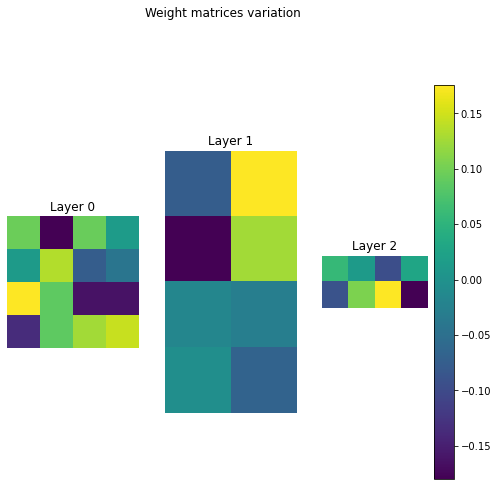

In [23]:
# Plot the variation

plt.figure(figsize=(8,8))
for n in range(3):
    delta_l = w1_layers[n] - w0_layers[n]
    print('Layer '+str(n)+': bias variation: ', np.linalg.norm(b1_layers[n] - b0_layers[n]))
    ax = plt.subplot(1,3,n+1)
    plt.imshow(delta_l)
    plt.title('Layer '+str(n))
    plt.axis('off')
plt.colorbar()
plt.suptitle('Weight matrices variation');

# different color means difference in the weights before training and after training of the model.

In [ ]:
# Now we will do the same process but now we will freeze the layers

#### Freeze layers at build time

In [31]:
def get_weights(model):
  return [e.weights[0].numpy() for e in model.layers]

def get_biases(model):
  return [e.bias.numpy() for e in model.layers]

# Plot the variation

def plot_delta_weights(w0_layers, w1_layers, b0_layers, b1_layers):
  plt.figure(figsize=(8,8))
  for n in range(3):
      delta_l = w1_layers[n] - w0_layers[n]
      print('Layer '+str(n)+': bias variation: ', np.linalg.norm(b1_layers[n] - b0_layers[n]))
      ax = plt.subplot(1,3,n+1)
      plt.imshow(delta_l)
      plt.title('Layer '+str(n))
      plt.axis('off')
  plt.colorbar()
  plt.suptitle('Weight matrices variation');


In [32]:
# Retrieve weights and biases

w0_layers = get_weights(model)
b0_layers = get_biases(model)

In [33]:
# Construct a synthetic dataset

x_train = np.random.random((100, 4))
y_train = x_train

x_test = np.random.random((20, 4))
y_test = x_test

In [34]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [35]:
# Retrieve weights and biases after training

w1_layers = get_weights(model)
b1_layers = get_biases(model)

Layer 0: bias variation:  0.04708304
Layer 1: bias variation:  0.030991316
Layer 2: bias variation:  0.17565787


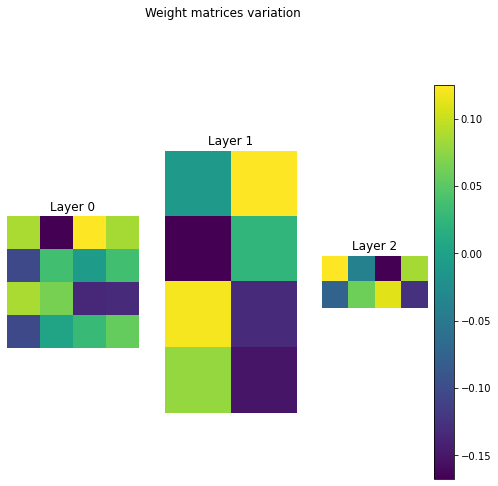

In [36]:
# Plot the variation

plot_delta_weights(w0_layers, w1_layers, b0_layers, b1_layers)

In [37]:
# Freeze layers at build time

# Count the trainable and non trainable variables after the freezing

n_trainable_variables = len(model.trainable_variables)
n_non_trainable_variables = len(model.non_trainable_variables)

In [38]:
# Display the number of trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)


 After freezing:
	 Number of trainable variables:  6 
	 Number of non trainable variables:  0
